In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def count_files(dir_path):
    count = 0
    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            count += 1
    return count

In [3]:
count_files('./')

7

In [4]:
def count_directories(root_path):
    count = 0
    # Iterate directory
    for path in os.listdir(root_path):
        # check if current path is a file
        if os.path.isdir(os.path.join(root_path, path)):
            count += 1
    return count

In [5]:
count_directories('./')

4

In [6]:
def get_all_subdir_path(root_path):
    subdirs = []
    # Iterate directory
    for path in os.listdir(root_path):
        # check if current path is a file
        if os.path.isdir(os.path.join(root_path, path)):
            subdirs.append(path)
    return subdirs

In [7]:
get_all_subdir_path("output/2000")

['H.R.1905',
 'H.R.1906',
 'H.R.2084',
 'H.R.2466',
 'H.R.2561',
 'H.R.2587',
 'H.R.2605',
 'H.R.2606',
 'H.R.2670',
 'H.R.3064',
 'H.R.3194',
 'H.R.3196',
 'S.1122',
 'S.1143',
 'S.1186',
 'S.1206',
 'S.1217',
 'S.1233',
 'S.1234',
 'S.1283']

In [8]:
count_files(os.path.join("output/2000", 'H.R.1905'))

1

In [9]:
d = []
for year in range(2001, 2023):
    subdirs_year = get_all_subdir_path(f"output/{year}")
    for subdir in subdirs_year:
        d.append(
            {
                "year": year,
                "bill_id": subdir,
                "num_amdt": count_files(os.path.join(f"output/{year}", subdir)) -1
            }
        )

In [10]:
amdt = pd.DataFrame(d)
amdt

,year,bill_id,num_amdt
0,2001,H.R.4425,1
1,2001,H.R.4461,134
2,2001,H.R.4475,35
3,2001,H.R.4516,4
4,2001,H.R.4576,107
...,...,...,...
181,2021,H.R.7617,14
182,2022,H.R.2471,18
183,2022,H.R.4346,44
184,2022,H.R.4373,5


Text(0.5, 1.0, 'Total Number of Amendments by Year')

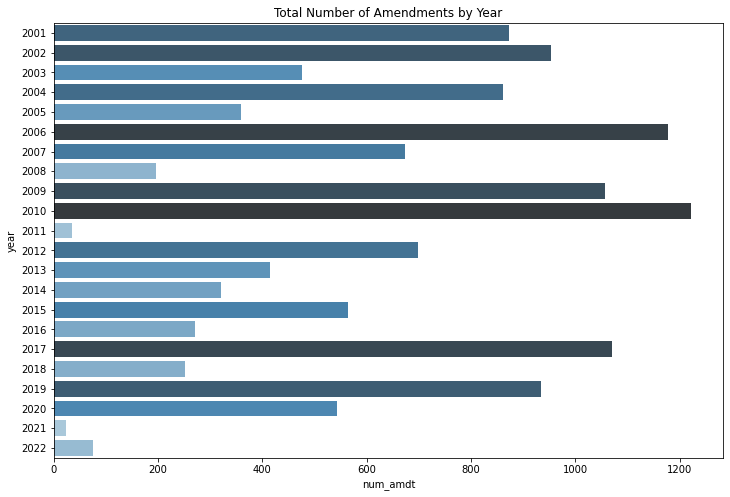

In [11]:
year_total = amdt.groupby("year")[["num_amdt"]].sum().reset_index()
pal = sns.color_palette("Blues_d", len(year_total))
rank = year_total["num_amdt"].argsort().argsort()

plt.figure(figsize=(12, 8))
sns.barplot(data = year_total, 
            x="num_amdt", y="year", orient="h", 
           palette=np.array(pal[::1])[rank])
plt.title("Total Number of Amendments by Year")

Text(0.5, 1.0, 'Average Number of Amendments per Bill* by Year')

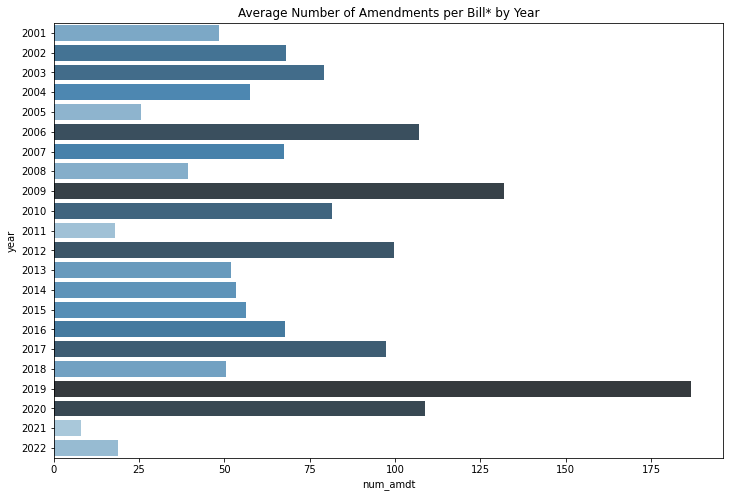

In [12]:
year_total = amdt.groupby("year")[["num_amdt"]].mean().reset_index()
pal = sns.color_palette("Blues_d", len(year_total))
rank = year_total["num_amdt"].argsort().argsort()

plt.figure(figsize=(12, 8))
sns.barplot(data = year_total, 
            x="num_amdt", y="year", orient="h", 
           palette=np.array(pal[::1])[rank])
plt.title("Average Number of Amendments per Bill* by Year")